In [19]:
import funcs
from funcs import pre_cdf,formatted_time,get_con_subs,split_array,check_same_sign

import numpy as np

In [20]:
print(funcs.cdf_fs)

[WindowsPath('thc_l1_state_20080101.cdf'), WindowsPath('thc_l2_efi_20080101_v01.cdf'), WindowsPath('thc_l2_esa_20080101_v01.cdf'), WindowsPath('thc_l2_fbk_20080101_v01.cdf'), WindowsPath('thc_l2_fft_20080101_v01.cdf'), WindowsPath('thc_l2_fgm_20080101_v01.cdf'), WindowsPath('thc_l2_fit_20080101_v01.cdf'), WindowsPath('thc_l2_gmom_20080101_v01.cdf'), WindowsPath('thc_l2_mom_20080101_v01.cdf'), WindowsPath('thc_l2_scm_20080101_v01.cdf'), WindowsPath('thc_l2_sst_20080101_v01.cdf')]


In [21]:
# 20080101
# fgm
fgm, fgm_d = pre_cdf('thc_l2_fgm_20080101_v01.cdf')
print("\n---\n")
# state
state, state_d = pre_cdf('thc_l1_state_20080101.cdf')

No records found for variable thc_fgs_btotalQ
No records found for variable thc_fgs_gseQ
No records found for variable thc_fgs_gsmQ
No records found for variable thc_fgs_dslQ
No records found for variable thc_fgs_epoch
No records found for variable thc_fgl_btotalQ
No records found for variable thc_fgl_gseQ
No records found for variable thc_fgl_gsmQ
No records found for variable thc_fgl_dslQ
No records found for variable thc_fgl_sslQ
No records found for variable thc_fgl_epoch16
No records found for variable thc_fgh_btotalQ
No records found for variable thc_fgh_gseQ
No records found for variable thc_fgh_gsmQ
No records found for variable thc_fgh_dslQ
No records found for variable thc_fgh_sslQ
No records found for variable thc_fgh_epoch16
No records found for variable thc_fge_btotalQ
No records found for variable thc_fge_btotal
No records found for variable thc_fge_gseQ
No records found for variable thc_fge_gse
No records found for variable thc_fge_gsmQ
No records found for variable thc_

In [22]:
# needed vars
# state
pos_vars = ['thc_pos_gsm', 'thc_pos_gsm_labl', 'thc_pos_gsm_unit', 'thc_pos_gsm_compno', 'thc_state_epoch0', 'thc_state_time']
# data assignment initialization
thc_pos_gsm = state_d['thc_pos_gsm']
thc_state_time = state_d['thc_state_time']
# needed information
state.varattsget('thc_pos_gsm')

{'CATDESC': 'thc_pos_gsm',
 'DEPEND_0': 'thc_state_epoch',
 'DEPEND_1': 'thc_pos_gsm_compno',
 'DISPLAY_TYPE': 'time_series',
 'FIELDNAM': 'thc_pos_gsm',
 'FILLVAL': nan,
 'FORMAT': 'F12.1',
 'LABL_PTR_1': 'thc_pos_gsm_labl',
 'UNIT_PTR': 'thc_pos_gsm_unit',
 'VALIDMIN': array([-2000000., -2000000., -2000000.], dtype=float32),
 'VALIDMAX': array([2000000., 2000000., 2000000.], dtype=float32),
 'VAR_TYPE': 'data',
 'COORDINATE_SYSTEM': 'GSM',
 'REPRESENTATION_1': 'Rep_xyz_gsm',
 'TENSOR_ORDER': '1',
 'SCALETYP': 'linear',
 'DEPEND_TIME': 'thc_state_time',
 'DEPEND_EPOCH0': 'thc_state_epoch0'}

In [23]:
# needed variables 
fgm_vars = ['thc_fgm_fgl_quality', 'thc_fgl_btotal', 'thc_fgl_gsm', 'thc_fgl_compno', 'thc_fgl_time', 'thc_fgl_epoch0', 'thc_fgl_labl']
# data assignment initialization
thc_fgl_gsm = fgm_d['thc_fgl_gsm']
thc_fgl_time = fgm_d['thc_fgl_time'] # 4hz
# print necessary information of gsm
print(fgm.varattsget('thc_fgl_gsm'))
print(fgm.varattsget('thc_fgl_time'))

{'CATDESC': 'FGL magnetic field B in XYZ GSM Coordinates', 'DISPLAY_TYPE': 'time_series', 'FIELDNAM': 'BXYZ GSM Coordinate, nT units', 'FILLVAL': -1e+30, 'FORMAT': 'E13.6', 'DEPEND_TIME': 'thc_fgl_time', 'DEPEND_EPOCH0': 'thc_fgl_epoch0', 'DEPEND_0': 'thc_fgl_epoch16', 'VALIDMIN': array([-25000., -25000., -25000.], dtype=float32), 'VALIDMAX': array([25000., 25000., 25000.], dtype=float32), 'VAR_TYPE': 'data', 'TENSOR_ORDER': '1', 'PROPERTY': 'vector', 'SC_ID': 'c', 'UNITS': 'nT GSM', 'VAR_NOTES': 'Units are in nanotesla', 'AVG_TYPE': 'standard', 'CALIB_SOFTWARE': 'fgm_calibrate, thm_cal_fgm, thm_cal_fit', 'CALIB_INPUT': 'thc_fgmcal.txt', 'SCALE_TYP': 'linear', 'DICT_KEY': 'magnetic_field>vector_GSM', 'SI_CONVERSION': '1e-9>T', 'LABL_PTR_1': 'thc_fgl_labl', 'DEPEND_1': 'thc_fgl_compno', 'COORDINATE_SYSTEM': 'GSM>Geocentric Solar Magnetic', 'REPRESENTATION_1': 'Rep_xyz'}
{'CATDESC': 'thc_fgl, UTC, in seconds since 01-Jan-1970 00:00:00', 'FIELDNAM': 'thc_fgl_time', 'FILLVAL': -1e+30, 'FOR

In [24]:
formatted_time(thc_state_time[0])

'2008-01-01 08:00:00'

In [25]:
formatted_time(thc_fgl_time[0])

'2008-01-01 08:23:18'

In [26]:
RE = 6371 # km
thc_pos_gsm_abs = np.abs(thc_pos_gsm)
# use conditions to filter 'thc_pos_gsm'
cond_y = thc_pos_gsm_abs[:, 1] < 5 * RE
cond_x = ((thc_pos_gsm_abs[:, 0] > 9 * RE) & (thc_pos_gsm_abs[:, 0] < 19 * RE))
combined_cond = cond_y & cond_x
filtered_thc_pos_gsm = thc_pos_gsm[combined_cond]
filtered_thc_state_time = thc_state_time[combined_cond]

In [27]:
con_subs = get_con_subs(filtered_thc_state_time)
# 20
state_arrays20 = split_array(con_subs[0], 20)  # len(con_subs) not always be 1

In [28]:
print("the start time of thc_fgl_time:",formatted_time(thc_fgl_time[0]))
print("the end time of thc_fgl_time:",formatted_time(thc_fgl_time[-1]))
print("the start time of state_arrays20:", formatted_time(state_arrays20[0][0]))
print("the end time of state_arrays20:", formatted_time(state_arrays20[-1][-1]))

the start time of thc_fgl_time: 2008-01-01 08:23:18
the end time of thc_fgl_time: 2008-01-01 20:30:46
the start time of state_arrays20: 2008-01-01 08:00:00
the end time of state_arrays20: 2008-01-01 13:19:00


In [29]:
thc_fgl_time_floor = np.floor(thc_fgl_time)

In [30]:
fgl_split_ids = []  # ids for split data of thc_fgl_...
for i in range(2, len(state_arrays20) - 1):
    fgl_split_ids.append((np.where(thc_fgl_time_floor == state_arrays20[i][0])[0][0],
                          np.where(thc_fgl_time_floor == state_arrays20[i][-1])[0][-1]))

In [31]:
# thc_fgl_time_arrays = []
# for id in fgl_split_ids:
#     thc_fgl_time_array = thc_fgl_time[id[0]:id[1]+1]
#     thc_fgl_time_arrays.append(thc_fgl_time_array)

In [32]:
Bx = thc_fgl_gsm[:, 0]
cond_bx = []
for id in fgl_split_ids:
    Bxs = Bx[id[0]:id[1]+1]
    if check_same_sign(Bxs):
        cond_bx.append(1)
    else:
        cond_bx.append(0)

In [33]:
fgl_split_ids = [id for id,selector in zip(fgl_split_ids,cond_bx) if selector]  # filter the fgl_split_ids using the cond_bx
# the fgl_split_ids is the ids for fgl which satisfies the cond_x, cond_y and cond_bx.

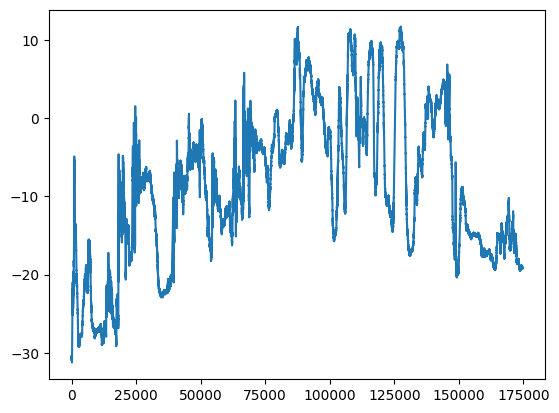

In [35]:
import matplotlib.pyplot as plt
plt.plot(Bx)